# In this Jupyter notebook I will compare the genes responsible for formation of multicellular phenotypes between cerevisiae, pombe and albicans. Analysis done with data accessed on 7th of March 2023.



Source:

http://www.candidagenome.org/download/homology/orthologs/

https://www.pombase.org/data/orthologs/

http://current.geneontology.org/products/pages/downloads.html

In [188]:
#import data science packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import goatools

#import obo_parser
from goatools import obo_parser
from goatools.obo_parser import GODag
map = pd.read_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv", sep="\t", header=None)


In [189]:
#read file /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans_GO.gaf with pandas
albicans_GO = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans_GO.gaf', sep='\t', header=49)
#columns should be named as DB, DB Object, DB Object Symbol, Qualifier, GO ID, DB:Reference (|DB:Reference), Evidence Code, With (or) From, Aspect, DB Object Name, DB Object Synonym (|Synonym), DB Object Type, Taxon(|taxon), 	Date, Assigned By,  Annotation Extension, Gene product form ID
albicans_GO.columns = ['DB', 'DB Object', 'DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference', 'Evidence Code', 'With (or) From', 'Aspect', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'Taxon', 'Date', 'Assigned By', 'Annotation Extension', 'Gene product form ID']

In [190]:
#repeat for cerevisiae
cerevisiae_GO = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/cerevisiae_GO.gaf', sep='\t', header=35)
cerevisiae_GO.columns = ['DB', 'DB Object', 'DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference', 'Evidence Code', 'With (or) From', 'Aspect', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'Taxon', 'Date', 'Assigned By', 'Annotation Extension', 'Gene product form ID']


In [191]:
#repeat for pombe
pombe_GO = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/pombe_GO.gaf', sep='\t', header=35)
pombe_GO.columns = ['DB', 'DB Object', 'DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference', 'Evidence Code', 'With (or) From', 'Aspect', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'Taxon', 'Date', 'Assigned By', 'Annotation Extension', 'Gene product form ID']

In [192]:
#read in the following txt file /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans-cerevisiae.txt
albicans_cerevisiae = pd.read_table('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans-cerevisiae.txt', sep='\t', header=8)
#move column names to first row
albicans_cerevisiae.iloc[0] = albicans_cerevisiae.columns
#change first albicans name entry to NaN
albicans_cerevisiae.iloc[0,1] = np.nan
#rename columns to albicans systematic, albicans  gene name, albicans database ID, cerevisiae systematic, cerevisiae gene name, cerevisiae single_entry_database ID
albicans_cerevisiae.columns = ['albicans systematic', 'albicans  gene name', 'albicans database ID', 'cerevisiae systematic', 'cerevisiae gene name', 'cerevisiae database ID']

In [193]:
#read in the following txt file /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans-pombe.txt
albicans_pombe = pd.read_table('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/albicans-pombe.txt', sep='\t', header=8)
#move column names to first row
albicans_pombe.iloc[0] = albicans_pombe.columns
#change first albicans name entry to NaN
albicans_pombe.iloc[0,1] = np.nan
#rename columns to albicans systematic, albicans  gene name, albicans database ID, pombe systematic, pombe gene name, pombe database ID
albicans_pombe.columns = ['albicans systematic', 'albicans  gene name', 'albicans database ID', 'pombe systematic', 'pombe gene name', 'pombe database ID']
albicans_pombe

,albicans systematic,albicans gene name,albicans database ID,pombe systematic,pombe gene name,pombe database ID
0,CR_07050C_A,NaN,CAL0000196578,SPAC22G7.06c,SPAC22G7.06c.1,SPAC22G7.06c.2
1,CR_00640W_A,ACC1,CAL0000198598,SPAC56E4.04c,SPAC56E4.04c,SPAC56E4.04c
2,C4_00970C_A,MDN1,CAL0000174407,SPCC737.08,SPCC737.08,SPCC737.08
3,C2_07330W_A,TOR1,CAL0000187577,SPBC216.07c,SPBC216.07c,SPBC216.07c
4,C6_01320W_A,TRA1,CAL0000175793,SPBP16F5.03c,SPBP16F5.03c,SPBP16F5.03c
...,...,...,...,...,...,...
2598,C4_06840W_A,NaN,CAL0000196332,SPCC736.09c,SPCC736.09c,SPCC736.09c
2599,C1_09480W_A,PPT2,CAL0000183849,SPAC3G9.17,SPAC3G9.17,SPAC3G9.17
2600,C5_02110W_A,NaN,CAL0000180850,SPAP8A3.04c,SPAP8A3.04c,SPAP8A3.04c
2601,C5_02080C_A,HSP12,CAL0000182697,SPAP8A3.04c,SPAP8A3.04c,SPAP8A3.04c


In [194]:
#read in /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/pombe-cerevisiae.tsv
pombe_cerevisiae = pd.read_table('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/pombe-cerevisiae.tsv', sep='\t', header=0)
#rename columns to pombe systematic and cerevisiae systematic
pombe_cerevisiae.columns = ['pombe systematic', 'cerevisiae systematic']


In [195]:
#get genes of interest from cerevisae
go_terms_cerevisae = {
    
 "GO:0000128" : "flocculation",
 "GO:0098609": "cell-cell adhesion",
 "GO:0007155": "cell adhesion",
 "GO:0000128": "flocculation",
"GO:0007155": "cell adhesion",
"GO:0060256":" regulation of flocculation",
"GO:0001403":"invasive growth in response to glucose limitation",
"GO:2000218":"negative regulation of invasive growth in response to glucose limitation",
"GO:2000219": "positive regulation of invasive growth in response to glucose limitation",
"GO:0030447":"filamentous growth",
"GO:0000128":"flocculation",
"GO:0060257":"negative regulation of flocculation",
"GO:1900735":"positive regulation of flocculation",
"GO:0060256":"regulation of flocculation",
"GO:0062040": "fungal biofilm matrix",
"GO:0042710": "biofilm formation",
"GO:0043709": "cell adhesion involved in single-species biofilm formation",
"GO:0043710": "cell adhesion involved in multi-species biofilm formation",
"GO:1900189":"positive regulation of cell adhesion involved in single-species biofilm formation",
"GO:1900231":"regulation of single-species biofilm formation on inanimate substrate",
"GO:0044011":"single-species biofilm formation on inanimate substrate",
"GO:0090606":"single-species surface biofilm formation",
"GO:0050839": "cell adhesion molecule binding",
"GO:0007155": "cell adhesion",
"GO:0098609": "cell-cell adhesion",
"GO:0007160":"cell-matrix adhesion",
"GO:0010811": "positive regulation of cell-substrate adhesion"}
#get genes from cerevisiae_GO that have GO ID in go_terms_cerevisae.keys()
cerevisiae_genes = cerevisiae_GO[cerevisiae_GO['GO ID'].isin(go_terms_cerevisae.keys())]
#get systematic names from the DB Object Synonym column before the |
cerevisiae_genes= np.array(cerevisiae_genes['DB Object Synonym'].str.split('|').str[0])
#remove repeats
cerevisiae_genes = np.unique(cerevisiae_genes)
#change dtype to string
cerevisiae_genes = cerevisiae_genes.astype(str)
#manual curation
#add YER027C, YDR477W, YGL115W
cerevisiae_genes = np.append(cerevisiae_genes, ['YER027C', 'YDR477W', 'YGL115W'])
#in cerevisiae_genes numpy array remove entries that do not start with Y
cerevisiae_genes = cerevisiae_genes[np.char.startswith(cerevisiae_genes, 'Y')]

cerevisiae_genes

array(['YAL056W', 'YAL063C', 'YAR050W', 'YBL016W', 'YBR066C', 'YBR083W',
       'YBR095C', 'YBR171W', 'YBR289W', 'YCL047C', 'YCR089W', 'YDL024C',
       'YDL035C', 'YDL159W', 'YDL230W', 'YDR043C', 'YDR103W', 'YDR107C',
       'YDR363W-A', 'YDR392W', 'YDR477W', 'YDR480W', 'YEL071W', 'YER020W',
       'YER027C', 'YER109C', 'YER113C', 'YER124C', 'YER149C', 'YFL014W',
       'YGL032C', 'YGL121C', 'YGL208W', 'YGR040W', 'YGR270W', 'YHL007C',
       'YHR030C', 'YHR073W', 'YHR084W', 'YHR111W', 'YHR211W', 'YHR213W',
       'YIL008W', 'YIL034C', 'YIL084C', 'YIR019C', 'YJL089W', 'YJR004C',
       'YKL092C', 'YKR102W', 'YLR083C', 'YLR229C', 'YLR362W', 'YMR116C',
       'YMR263W', 'YMR307W', 'YMR316W', 'YNL079C', 'YNL097C', 'YNL119W',
       'YNL197C', 'YNL294C', 'YNR044W', 'YOL051W', 'YOL151W', 'YOR080W',
       'YOR127W', 'YOR212W', 'YOR275C', 'YOR290C', 'YOR315W', 'YOR371C',
       'YPL049C', 'YPL089C', 'YPL203W', 'YSC0042', 'YER027C', 'YDR477W',
       'YGL115W'], dtype='<U41')

In [196]:
go_terms_cerevisae_to_csv = pd.DataFrame.from_dict(go_terms_cerevisae, orient='index')
go_terms_cerevisae_to_csv.to_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/go_terms.csv')

In [197]:
go_terms_albicans = {
 "GO:0000128" : "flocculation",
 "GO:0098609": "cell-cell adhesion",
 "GO:0007155": "cell adhesion",
 "GO:0000128": "flocculation",
"GO:0007155": "cell adhesion",
"GO:0060256":" regulation of flocculation",
"GO:0001403":"invasive growth in response to glucose limitation",
"GO:2000218":"negative regulation of invasive growth in response to glucose limitation",
"GO:2000219": "positive regulation of invasive growth in response to glucose limitation",
"GO:0030447":"filamentous growth",
"GO:0000128":"flocculation",
"GO:0060257":"negative regulation of flocculation",
"GO:1900735":"positive regulation of flocculation",
"GO:0060256":"regulation of flocculation",
"GO:0062040": "fungal biofilm matrix",
"GO:0042710": "biofilm formation",
"GO:0043709": "cell adhesion involved in single-species biofilm formation",
"GO:0043710": "cell adhesion involved in multi-species biofilm formation",
"GO:1900189":"positive regulation of cell adhesion involved in single-species biofilm formation",
"GO:1900231":"regulation of single-species biofilm formation on inanimate substrate",
"GO:0044011":"single-species biofilm formation on inanimate substrate",
"GO:0090606":"single-species surface biofilm formation",
"GO:0050839": "cell adhesion molecule binding",
"GO:0007155": "cell adhesion",
"GO:0098609": "cell-cell adhesion",
"GO:0007160":"cell-matrix adhesion",
"GO:0010811": "positive regulation of cell-substrate adhesion"
}

#get genes from albicans_GO that have GO ID in go_terms_albicans.keys()
albicans_genes = albicans_GO[albicans_GO['GO ID'].isin(go_terms_albicans.keys())]
#allow database only CGD
#albicans_genes = albicans_genes[albicans_genes['DB'].isin(['CGD'])]
#get systematic names from the DB Object Synonym column before the |
albicans_genes= np.array(albicans_genes['DB Object Synonym'].str.split('|').str[0])
#remove nans
albicans_genes = albicans_genes[~pd.isnull(albicans_genes)]
#remove repeats
albicans_genes = np.unique(albicans_genes)
#keep each gene if it starts with C1, C2, C3, C4, C5, C6 or C7
albicans_genes = np.array([x for x in albicans_genes if x.startswith(('C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'))])
#manual curation if needed
albicans_genes

array(['C1_00060W_A', 'C1_00080C_A', 'C1_00110W_A', 'C1_00140W_A',
       'C1_00150C_A', 'C1_00160C_A', 'C1_00180W_A', 'C1_00220W_A',
       'C1_00490C_A', 'C1_00610W_A', 'C1_00620W_A', 'C1_00650C_A',
       'C1_00670C_A', 'C1_00730C_A', 'C1_00780C_A', 'C1_00930C_A',
       'C1_00950C_A', 'C1_00960C_A', 'C1_01130W_A', 'C1_01170C_A',
       'C1_01270W_A', 'C1_01760W_A', 'C1_01980W_A', 'C1_02120C_A',
       'C1_02150W_A', 'C1_02260C_A', 'C1_02480W_A', 'C1_02840W_A',
       'C1_02860C_A', 'C1_02920W_A', 'C1_02990C_A', 'C1_03110W_A',
       'C1_03190C_A', 'C1_03220C_A', 'C1_03380W_A', 'C1_03500W_A',
       'C1_03510C_A', 'C1_03710C_A', 'C1_03730C_A', 'C1_03740W_A',
       'C1_03770W_A', 'C1_03860C_A', 'C1_04020C_A', 'C1_04140W_A',
       'C1_04300C_A', 'C1_04380W_A', 'C1_04410C_A', 'C1_04520C_A',
       'C1_04540C_A', 'C1_04770C_A', 'C1_05070C_A', 'C1_05090W_A',
       'C1_05140W_A', 'C1_05760C_A', 'C1_06010W_A', 'C1_06020W_A',
       'C1_06280C_A', 'C1_06370C_A', 'C1_06680W_A', 'C1_06810W

In [198]:
go_terms_pombe = {
 "GO:0000128" : "flocculation",
 "GO:0098609": "cell-cell adhesion",
 "GO:0007155": "cell adhesion",
 "GO:0000128": "flocculation",
"GO:0007155": "cell adhesion",
"GO:0060256":" regulation of flocculation",
"GO:0001403":"invasive growth in response to glucose limitation",
"GO:2000218":"negative regulation of invasive growth in response to glucose limitation",
"GO:2000219": "positive regulation of invasive growth in response to glucose limitation",
"GO:0030447":"filamentous growth",
"GO:0000128":"flocculation",
"GO:0060257":"negative regulation of flocculation",
"GO:1900735":"positive regulation of flocculation",
"GO:0060256":"regulation of flocculation",
"GO:0062040": "fungal biofilm matrix",
"GO:0042710": "biofilm formation",
"GO:0043709": "cell adhesion involved in single-species biofilm formation",
"GO:0043710": "cell adhesion involved in multi-species biofilm formation",
"GO:1900189":"positive regulation of cell adhesion involved in single-species biofilm formation",
"GO:1900231":"regulation of single-species biofilm formation on inanimate substrate",
"GO:0044011":"single-species biofilm formation on inanimate substrate",
"GO:0090606":"single-species surface biofilm formation",
"GO:0050839": "cell adhesion molecule binding",
"GO:0007155": "cell adhesion",
"GO:0098609": "cell-cell adhesion",
"GO:0007160":"cell-matrix adhesion",
"GO:0010811": "positive regulation of cell-substrate adhesion"
}
#get genes from pombe_GO that have GO ID in go_terms_pombe.keys()
pombe_genes = pombe_GO[pombe_GO['GO ID'].isin(go_terms_pombe.keys())]
#get systematic names from the DB Object Synonym column before the |
pombe_genes= np.array(pombe_genes['DB Object'])

#remove nans
pombe_genes = pombe_genes[~pd.isnull(pombe_genes)]

pombe_genes = pombe_genes.astype(str)
pombe_genes = np.unique(pombe_genes)
pombe_genes


array(['SPAC186.01', 'SPAC1F8.06', 'SPAC977.07c', 'SPAP11E10.02c',
       'SPAPB15E9.01c', 'SPAPB2C8.01', 'SPBC1289.15', 'SPBC1348.08c',
       'SPBC15D4.02', 'SPBC21D10.06c', 'SPBC317.01', 'SPBC359.04c',
       'SPBC947.04', 'SPBPJ4664.02', 'SPCC1223.13', 'SPCC188.09c'],
      dtype='<U13')

In [199]:
#code:
# get a list of genes that are relevant in each species
# #for each gene check if its in the other two species
#create a df with columns: albicans_name(s), cerevisiae_name(s), albicans_name(s), albicans, cerevisiae, pombe
def make_dbase(albicans_genes, cerevisiae_genes, pombe_genes):
    database = pd.DataFrame(columns=['albicans_name(s)', 'cerevisiae_name(s)', 'pombe_name(s)', 'albicans', 'cerevisiae', 'pombe'])
    # check for each gene in cerevisiae genes if it has an ortholog
    #suppress warnings
    import warnings
    warnings.filterwarnings("ignore")
    for gene in cerevisiae_genes:
        orthologs_albicans = np.array([])
        orthologs_pombe = np.array([])
        #get orthologs from cerevisiae
        orthologs_albicans=np.append(orthologs_albicans,albicans_cerevisiae[albicans_cerevisiae['cerevisiae systematic'] == gene]['albicans systematic'].values)
        orthologs_pombe = np.append(orthologs_pombe,pombe_cerevisiae[pombe_cerevisiae['cerevisiae systematic'] == gene]['pombe systematic'].values)
        #if length of albicans orthologs is more than 0, then check if the albicans orthologs have a pombe ortholog
        if len(orthologs_albicans) > 0:
            #loop thorugh albicans orthologs and see if they have a pombe ortholog in the albicans_pombe df
            for ortholog in orthologs_albicans:
                #get pombe orthologs from albicans
                orthologs_pombe = np.append(orthologs_pombe,albicans_pombe[albicans_pombe['albicans systematic'] == ortholog]['pombe systematic'].values)
            #same the other way around
        if len(orthologs_pombe) > 0:
            for ortholog in orthologs_pombe:
                orthologs_albicans = np.append(orthologs_albicans,albicans_pombe[albicans_pombe['pombe systematic'] == ortholog]['albicans systematic'].values)

            #remove repeats
        orthologs_albicans = np.unique(orthologs_albicans)
        orthologs_pombe = np.unique(orthologs_pombe)
            #add to database
            #if there are pombe and albicans orthologs set their binary to 1
        pombe_binary=0
        albicans_binary=0
        if len(orthologs_pombe) > 0:
            pombe_binary=1
        if len(orthologs_albicans) > 0:
            albicans_binary=1

        database = database.append({'albicans_name(s)': orthologs_albicans, 'cerevisiae_name(s)': gene, 'pombe_name(s)': orthologs_pombe, 'albicans': albicans_binary, 'cerevisiae': 1, 'pombe': pombe_binary}, ignore_index=True)

    for gene in albicans_genes:
        orthologs_cerevisiae = np.array([])
        orthologs_pombe = np.array([])
        #get orthologs from cerevisiae
        orthologs_cerevisiae=np.append(orthologs_cerevisiae,albicans_cerevisiae[albicans_cerevisiae['albicans systematic'] == gene]['cerevisiae systematic'].values)
        orthologs_pombe = np.append(orthologs_pombe,albicans_pombe[albicans_pombe['albicans systematic'] == gene]['pombe systematic'].values)
        #if length of albicans orthologs is more than 0, then check if the albicans orthologs have a pombe ortholog
        if len(orthologs_cerevisiae) > 0:
            #loop thorugh albicans orthologs and see if they have a pombe ortholog in the albicans_pombe df
            for ortholog in orthologs_cerevisiae:
                #get pombe orthologs from albicans
                orthologs_pombe = np.append(orthologs_pombe,pombe_cerevisiae[pombe_cerevisiae['cerevisiae systematic'] == ortholog]['pombe systematic'].values)
        #same the other way around
        if len(orthologs_pombe) > 0:
            for ortholog in orthologs_pombe:
                orthologs_cerevisiae = np.append(orthologs_cerevisiae,pombe_cerevisiae[pombe_cerevisiae['pombe systematic'] == ortholog]['cerevisiae systematic'].values)
        
        #remove repeats
        orthologs_cerevisiae = np.unique(orthologs_cerevisiae)
        orthologs_pombe = np.unique(orthologs_pombe)
        #add to database
        #if there are pombe and albicans orthologs set their binary to 1
        pombe_binary=0
        cerevisiae_binary=0
        if len(orthologs_pombe) > 0:
            pombe_binary=1
        if len(orthologs_cerevisiae) > 0:
            cerevisiae_binary=1
        database = database.append({'albicans_name(s)': gene, 'cerevisiae_name(s)': orthologs_cerevisiae, 'pombe_name(s)': orthologs_pombe, 'albicans': 1, 'cerevisiae': cerevisiae_binary, 'pombe': pombe_binary}, ignore_index=True)

    for gene in pombe_genes:
        orthologs_cerevisiae = np.array([])
        orthologs_albicans = np.array([])
        #get orthologs from cerevisiae
        orthologs_cerevisiae=np.append(orthologs_cerevisiae,pombe_cerevisiae[pombe_cerevisiae['pombe systematic'] == gene]['cerevisiae systematic'].values)
        orthologs_albicans = np.append(orthologs_albicans,albicans_pombe[albicans_pombe['pombe systematic'] == gene]['albicans systematic'].values)
        #if length of albicans orthologs is more than 0, then check if the albicans orthologs have a pombe ortholog
        if len(orthologs_cerevisiae) > 0:
            #loop thorugh albicans orthologs and see if they have a pombe ortholog in the albicans_pombe df
            for ortholog in orthologs_cerevisiae:
                #get pombe orthologs from albicans
                orthologs_albicans = np.append(orthologs_albicans,albicans_cerevisiae[albicans_cerevisiae['cerevisiae systematic'] == ortholog]['albicans systematic'].values)
        #same the other way around
        if len(orthologs_albicans) > 0:
            for ortholog in orthologs_albicans:
                orthologs_cerevisiae = np.append(orthologs_cerevisiae,albicans_cerevisiae[albicans_cerevisiae['albicans systematic'] == ortholog]['cerevisiae systematic'].values)
        
        #remove repeats
        orthologs_cerevisiae = np.unique(orthologs_cerevisiae)
        orthologs_albicans = np.unique(orthologs_albicans)
        #add to database
        #if there are pombe and albicans orthologs set their binary to 1
        cerevisiae_binary=0
        albicans_binary=0
        if len(orthologs_cerevisiae) > 0:
            cerevisiae_binary=1
        if len(orthologs_albicans) > 0:
            albicans_binary
        database = database.append({'albicans_name(s)': orthologs_albicans, 'cerevisiae_name(s)': orthologs_cerevisiae, 'pombe_name(s)': gene, 'albicans': albicans_binary, 'cerevisiae': cerevisiae_binary, 'pombe': 1}, ignore_index=True)
    #reset index
    database = database.reset_index(drop=True)
    return database


In [200]:

def single_entry_dbase(database):
    #iterate through first three columns
    #if entry is a numpy array longer than 1, then save it, remove it from the df, iterate through it, and duplicaye it together with the whole row, add back into df
    #if entry is a numpy array of length 1, then save it, remove it from the df, and add it back as a string with the whole row
    #create empty df
    database_ = pd.DataFrame(columns=database.columns)

    for i in range(0,3):
        #if not first column, then database=database_.copy()
        if i != 0:
            database = database_.copy()
            database_ = pd.DataFrame(columns=database.columns)

        for index, row in database.iterrows():
            if type(row[i]) == np.ndarray:
                if len(row[i]) > 1:
                    #save entry
                    entry = row[i]
                    
                    #iterate through entry
                    for j in entry:
                        #duplicate row
                        new_row = row.copy()
                        #change entry
                        new_row[i] = j
                        
                        database_ = database_.append(new_row, ignore_index=True)
                elif len(row[i]) == 1:
                    #save entry
                    entry = row[i]
                    new_row = row.copy()
                    new_row[i] = entry[0]
                    #add row back to df
                    database_= database_.append(new_row, ignore_index=True)
                elif len(row[i]) == 0:
                    new_row = row.copy()
                    new_row[i] = np.nan
                    #add row back to df
                    database_= database_.append(new_row, ignore_index=True)
            else:
                database_ = database_.append(row, ignore_index=True)
        #reset the index
        database_ = database_.reset_index(drop=True)
            
    return database_

In [201]:
def add_ortholog_grps(sedb):

#cleaning sedb from instances where orthologs are not identified vice versa but only in one direction
    



    #loop throug the dbase
    #take the row and see if any of the elements reoccur in other rows. If so, then add the index of the row to a list. 
    # From these rows compile a list of albicans genes, cerevisiae genes and pombe genes
    # name this orthology group 0,1,2 etc.
    #remove all the rows in the original dbase
    #add a signle row to our new database with the orthology group name and the genes in the group from the resepctive species
    #return the new database
    new_dbase = pd.DataFrame(columns=sedb.columns)
    empty_dbase = sedb.copy()
    indices_=[]

    for i in range(0,len(sedb)):
        if i in indices_:
            continue
        temp_albicans=[]
        temp_cerevisiae=[]
        temp_pombe=[]
        indices = []
        indices.append(i)
        indices_.append(i)
        for j in range(i+1,len(sedb)):
            if j in indices_:
                continue
            if (sedb['albicans_name(s)'][i] == sedb['albicans_name(s)'][j] and str(sedb['albicans_name(s)'][i]) != "nan")  or (sedb['cerevisiae_name(s)'][i] == sedb['cerevisiae_name(s)'][j] and str(sedb['cerevisiae_name(s)'][i]) != "nan") or (sedb['pombe_name(s)'][i] == sedb['pombe_name(s)'][j] and str(sedb['pombe_name(s)'][i]) != "nan"):
                
                indices.append(j)
                
                
                indices_.append(j)
        
        #this database still might not be perfect, because some orthologs are not identified vice versa. This causes the problem, that
        # There might be a row A-B-C and a row D-E-F, where A and D and B and E and C and F are all orthologs, yet due to no overlap, the algorithm
        # wont pair these rows.
        #now iterate through these indices, and find additional indices
        for index in indices:
            for k in range(0,len(sedb)):
                if k in indices_:
                    continue
                if (sedb['albicans_name(s)'][index] == sedb['albicans_name(s)'][k] and str(sedb['albicans_name(s)'][index]) != "nan")  or (sedb['cerevisiae_name(s)'][index] == sedb['cerevisiae_name(s)'][k] and str(sedb['cerevisiae_name(s)'][index]) != "nan") or (sedb['pombe_name(s)'][index] == sedb['pombe_name(s)'][k] and str(sedb['pombe_name(s)'][index]) != "nan"):
                    indices.append(k)
                    indices_.append(k)

        #add genes to temp list
        for index in indices:
            temp_albicans.append(sedb['albicans_name(s)'][index])
            temp_cerevisiae.append(sedb['cerevisiae_name(s)'][index])
            temp_pombe.append(sedb['pombe_name(s)'][index])
        #remove rows from empty dbase
        empty_dbase = empty_dbase.drop(indices)
        #keep only unique entries
        temp_albicans = np.unique(temp_albicans)
        temp_cerevisiae = np.unique(temp_cerevisiae)
        temp_pombe = np.unique(temp_pombe)
        #add values to new database
        new_dbase = new_dbase.append({'albicans_name(s)': temp_albicans, 'cerevisiae_name(s)': temp_cerevisiae, 'pombe_name(s)': temp_pombe}, ignore_index=True)
        
       

    return new_dbase #, empty_dbase for checking

In [202]:
   #create Venn diagram
import matplotlib.pyplot as plt
import matplotlib_venn
from matplotlib_venn import venn3, venn3_circles,venn3_unweighted 
    #create venn diagram from database last 3 columns with white text
    #create white background


def ortho_to_venn(ortho, labels = ['S. pombe (GO)', 'S. cerevisiae (GO)', 'C. albicans (GO)']):
    #loop through df. if there is value other then [nan] for a species then add 1 to the respective field
    for index, row in ortho.iterrows():
        
        if len(row['albicans_name(s)']) == 1 and str(row['albicans_name(s)'][0]) == "nan":
            row["albicans"] = 0
        else:
            row["albicans"] = 1
        if len(row['cerevisiae_name(s)']) == 1 and str(row['cerevisiae_name(s)'][0]) == "nan":
            row["cerevisiae"] = 0
        else:
            row["cerevisiae"] = 1
        if len(row['pombe_name(s)']) == 1 and str(row['pombe_name(s)'][0]) == "nan":
            row["pombe"] = 0
        else:
            row["pombe"] = 1
    database = ortho.copy()
    #create a column called orthopattern, and based on the patterns, label with 1-6
    orthopattern = []
    for index, row in database.iterrows():
        if row["albicans"] == 1 and row["cerevisiae"] == 1 and row["pombe"] == 1:
            orthopattern.append(7)
        elif row["albicans"] == 1 and row["cerevisiae"] == 1 and row["pombe"] == 0:
            orthopattern.append(6)
        elif row["albicans"] == 1 and row["cerevisiae"] == 0 and row["pombe"] == 1:
            orthopattern.append(5)
        elif row["albicans"] == 0 and row["cerevisiae"] == 1 and row["pombe"] == 1:
            orthopattern.append(4)
        elif row["albicans"] == 1 and row["cerevisiae"] == 0 and row["pombe"] == 0:
            orthopattern.append(3)
        elif row["albicans"] == 0 and row["cerevisiae"] == 1 and row["pombe"] == 0:
            orthopattern.append(2)
        elif row["albicans"] == 0 and row["cerevisiae"] == 0 and row["pombe"] == 1:
            orthopattern.append(1)
    database["orthopattern"] = orthopattern
    fig = plt.subplots(figsize=(10,10))
    #create venn diagram based on orthopattern
    #count how many times each pattern occurs
    print(database["orthopattern"].value_counts())
    #create a dictionary with the pattern as key and the count as value
    venn_dic = {}
    for i in range(1,8):
        #loop through orthopattern and count how many times each pattern occurs
        count = 0
        for j in range(0,len(database)):
            if database["orthopattern"][j] == i:
                count += 1
        venn_dic[i] = count
    #create venn diagram wtih same circle size
    v = venn3_unweighted(subsets = (venn_dic[1], venn_dic[2], venn_dic[4], venn_dic[3], venn_dic[5], venn_dic[6], venn_dic[7]), set_labels = (labels),
    )
    

   
    for text in v.set_labels:
        text.set_fontsize(27)

    for text in v.subset_labels:
        text.set_fontsize(30)
        
    plt.gca().set_facecolor('white')
    plt.title('Venn diagram of orthologs')

    #chagne text to white

    plt.show()

    return database


In [203]:

def functional_ortho(final_ortho,albicans_genes, cerevisiae_genes, pombe_genes):
    #choose subset with orthopattern 7,5,6,4
    final_ortho = final_ortho[(final_ortho["orthopattern"] == 7) ]#| (final_ortho["orthopattern"] == 5) | (final_ortho["orthopattern"] == 6) | (final_ortho["orthopattern"] == 4)]
    #reset index
    final_ortho = final_ortho.reset_index(drop=True)
    #iterate through each row
    #check if "albicans_name(s)" has any entries in albicans_genes. do the same for cerevisiae and pombe
    #if it does, add 1 to the respective field in the row
    #set albicans, cerevisiae, pombe to all 0 columns
    final_ortho["albicans"] = np.zeros(len(final_ortho))
    final_ortho["cerevisiae"] = np.zeros(len(final_ortho))
    final_ortho["pombe"] = np.zeros(len(final_ortho))
    for index, row in final_ortho.iterrows():
        row["albicans"] = 0
        row["cerevisiae"] = 0
        row["pombe"] = 0
        for gene in albicans_genes:
            if gene in row["albicans_name(s)"]:
                final_ortho["albicans"][index] = 1
        for gene in cerevisiae_genes:
            if gene in row["cerevisiae_name(s)"]:
                final_ortho["cerevisiae"][index] = 1
        for gene in pombe_genes:
            if gene in row["pombe_name(s)"]:
                final_ortho["pombe"][index] = 1
                
                row["pombe"] = 1

    #depending on the pattern, create functional orthopatterns
    #create a column called orthopattern, and based on the patterns, label with 1-6
    #final_ortho["functional_orthopattern"] = 0
    func_orthopattern = []
    for index, row in final_ortho.iterrows():
        if row["albicans"] == 1 and row["cerevisiae"] == 1 and row["pombe"] == 1:
            print(row)
            func_orthopattern.append(7)
        if row["albicans"] == 1 and row["cerevisiae"] == 1 and row["pombe"] == 0:
            func_orthopattern.append(6)
        elif row["albicans"] == 1 and row["cerevisiae"] == 0 and row["pombe"] == 1:
            func_orthopattern.append(5)
        elif row["albicans"] == 0 and row["cerevisiae"] == 1 and row["pombe"] == 1:
            func_orthopattern.append(4)
        elif row["albicans"] == 1 and row["cerevisiae"] == 0 and row["pombe"] == 0:
            func_orthopattern.append(3)
        elif row["albicans"] == 0 and row["cerevisiae"] == 1 and row["pombe"] == 0:
            func_orthopattern.append(2)
        elif row["albicans"] == 0 and row["cerevisiae"] == 0 and row["pombe"] == 1:
            func_orthopattern.append(1)
    
    final_ortho["functional_orthopattern orthopattern"] = func_orthopattern
    #create venn diagram based on orthopattern
    #count how many times each pattern occurs
    print(final_ortho["functional_orthopattern orthopattern"])
    #create a dictionary with the pattern as key and the count as value
    venn_dic = {}
    for i in range(1,8):
        #loop through orthopattern and count how many times each pattern occurs
        count = 0
        for j in range(0,len(final_ortho)):
            if final_ortho["functional_orthopattern orthopattern"][j] == i:
                count += 1
        venn_dic[i] = count
    
    return final_ortho,venn_dic




In [218]:
#show overlaps in final_func_ortho, so orthopatterns: 7,6,5,4. show subset
def show_overlap(final_func_ortho,venn_dic, cats=[7], labels = ['S. pombe (GO)', 'S. cerevisiae (GO)', 'C. albicans (GO)']):
    #import map from /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv
    map = pd.read_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv", sep="\t", header=None)
    #choose columns 0,2,4
    map = map[[0,2,4]]
    #overlaps choose functional orthopatterns that fit cats
    overlaps = pd.DataFrame(columns=["albicans_name(s)","cerevisiae_name(s)","pombe_name(s)","albicans","cerevisiae","pombe"])
    for i in cats:
        #if functional orthopattern is i, add it to overlaps df
        for index, row in final_func_ortho.iterrows():
            if row["functional_orthopattern orthopattern"] == i:
                overlaps = overlaps.append(row)
#itrate through overlaps pombe_name(s). if not [nan], then try to find it in map[0]. if found, then add the name from map[1] to a new column called pombe_name and map[2] to a new column called pombe_function
    overlaps["gene common name"] = np.nan
    overlaps["pombe_function"] = np.nan
    for index, row in overlaps.iterrows():
        if str(row["pombe_name(s)"][0]) != "nan":
            
            for gene in row["pombe_name(s)"]:
                if gene in map[0].values:
                    if gene != "SPBP8B7.18c":
                        overlaps["gene common name"][index] = map[2][map[0] == gene].values
                        overlaps["pombe_function"][index] = map[4][map[0] == gene].values
                    else:
                        overlaps["gene common name"][index] = map[0][map[0] == gene].values
                        overlaps["pombe_function"][index] = map[4][map[0] == gene].values


    #create venn diagram
    fig= plt.subplots(figsize=(10,10))
    if venn_dic[1] > 0 and venn_dic[1] < 30:
        venn_dic[1] = ""
    if venn_dic[4] > 0 and venn_dic[4] < 30:
        venn_dic[4] = ""
    if venn_dic[5] > 0 and venn_dic[5] < 30:
        venn_dic[5] = ""
    if venn_dic[7] > 0 and venn_dic[7] < 30:
        venn_dic[7] = ""
    #labels with large fonts
    v = venn3_unweighted(subsets = (venn_dic[1],venn_dic[2],venn_dic[4],venn_dic[3],venn_dic[5],venn_dic[6],venn_dic[7]), set_labels = labels)
  
    #if a subset has less than 5 genes, then show the genes. FIrst find where to print on the plot, then print hte genes there from overlaps gene common name
    #make dashed lines
   
    for text in v.set_labels:
        text.set_fontsize(27)

    for text in v.subset_labels:
        text.set_fontsize(30)
    for i,ids in zip([1,2,4,3,5,6,7],("100","010","110","001","101","011","111")):
        
        x,y = v.get_label_by_id(ids).get_position()
        genes = np.array([j for j in overlaps["gene common name"][overlaps["functional_orthopattern orthopattern"]==i].values]).flatten()
        #make genes d type string
        genes = genes.astype(str)
        
        genes = np.unique(genes)
        #if less than 20 genes and middle overlap or top left 
        if len(genes)==0:
            continue
        if len(genes)<30:
            length_constant = 10/np.sqrt(len(genes))
            if length_constant > 5:
                length_constant = 5
            if ids == "100" or ids == "101" or ids == "111" or ids=="110":
                #if 111 then y+0.1
                if ids == "111" or ids == "101":
                    y += 0.01
                if ids=="110":
                    y += 0.01

                for i in range(len(genes)):
                    #if there are more than 15 entries than break them in two columns
                    if len(genes) > 8:
                        if i < len(genes)/2:
                            plt.text(x-0.18,0.11+y-i*0.014*length_constant,str(genes[i]), fontsize=6.5*length_constant)
                        else:
                            plt.text(x+0.045,0.1+y-(i-len(genes)/2)*0.014*length_constant,str(genes[i]), fontsize=6.5*length_constant)
                    elif len(genes) <3:
                        plt.text(x-0.1,0.1+y-i*0.013*length_constant,str(genes[i]), fontsize=6*length_constant)
                    else:
                        plt.text(x-0.1,0.1+y-i*0.010*length_constant,str(genes[i]), fontsize=4*length_constant)

    plt.gca().set_facecolor('white')
    plt.title('Venn diagram of functional orthologs')
    return overlaps


7    338
3    138
6     78
2     16
1     15
5      4
Name: orthopattern, dtype: int64


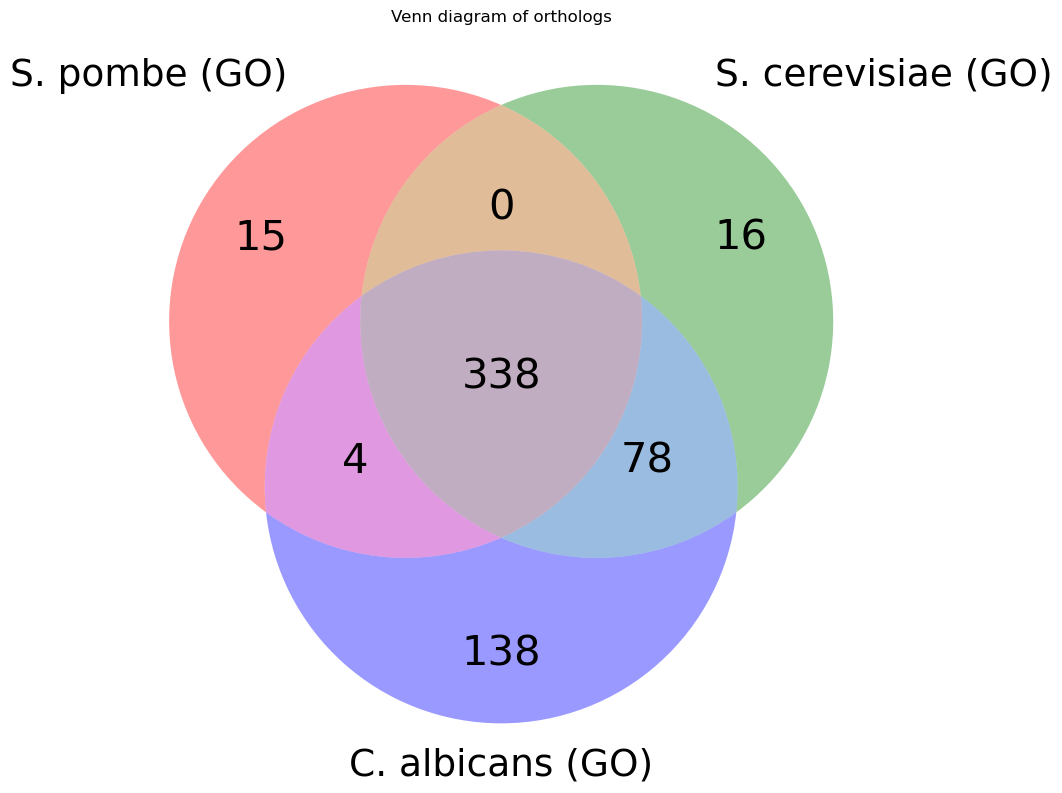

albicans_name(s)           [C4_01260W_A]
cerevisiae_name(s)    [YBR182C, YPL089C]
pombe_name(s)               [SPBC317.01]
albicans                             1.0
cerevisiae                           1.0
pombe                                1.0
orthopattern                           7
Name: 42, dtype: object
0      6
1      6
2      6
3      6
4      6
      ..
333    3
334    3
335    3
336    3
337    3
Name: functional_orthopattern orthopattern, Length: 338, dtype: int64


,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,functional_orthopattern orthopattern,orthopattern,gene common name,pombe_function
42,[C4_01260W_A],"[YBR182C, YPL089C]",[SPBC317.01],1.0,1.0,1.0,7.0,7.0,[mbx2],"[DNA-binding transcription factor, MADS-box Pvg4]"


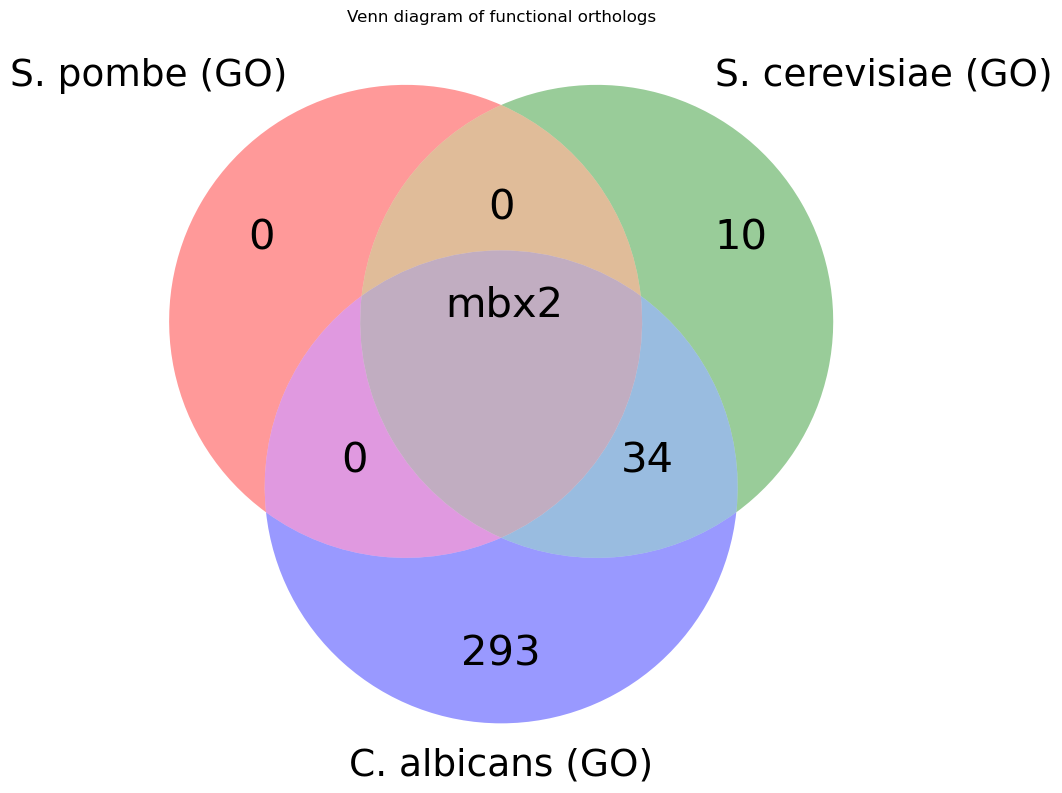

In [205]:
#final ortho
database = make_dbase(albicans_genes, cerevisiae_genes, pombe_genes)
sedb = single_entry_dbase(database)
ortho = add_ortholog_grps(sedb)
final_ortho = ortho_to_venn(ortho)
final_ortho.to_csv("final_orthology_database.csv")
final_func_ortho_,venn_dic = functional_ortho(final_ortho,albicans_genes, cerevisiae_genes, pombe_genes)


overlap = show_overlap(final_func_ortho_, venn_dic, cats=[7,6,5,4,3,2,1])
#export overlap where functional orthopattern is 7
overlap_=overlap[overlap["functional_orthopattern orthopattern"] == 7]
overlap_.to_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Orthologs/overlap_go.csv")
#annotated overlap
overlap_

In [206]:
#take all pombe genes from final_ortho in a flattened numpy array, and save it in a csv
pombe_genes_export = final_ortho["pombe_name(s)"].values
pombe_genes_export  = np.concatenate(pombe_genes_export)
pombe_genes_export= pd.DataFrame(pombe_genes_export)
#remove entries that are "nan"
pombe_genes_export = pombe_genes_export[pombe_genes_export[0] != "nan"]
#reset index
pombe_genes_export = pombe_genes_export.reset_index(drop=True)
#make first entry the column name
pombe_genes_export.columns = pombe_genes_export.iloc[0]
#remove first row
pombe_genes_export = pombe_genes_export.drop(pombe_genes_export.index[0])
#reset index
pombe_genes_export = pombe_genes_export.reset_index(drop=True)
#save to csv
pombe_genes_export.to_csv("pombe_genes_export.csv")

In [207]:
#similarly add annotations to final_func_ortho
def annotated_overlap(ffo):
    ffo["gene common name"] = np.nan
    ffo["pombe_function"] = np.nan
    for index, row in ffo.iterrows():
        if str(row["pombe_name(s)"][0]) != "nan":
            
            for gene in row["pombe_name(s)"]:
                if gene in map[0].values:
                    
                    ffo["gene common name"][index] = map[2][map[0] == gene].values
                    ffo["pombe_function"][index] = map[4][map[0] == gene].values
    return ffo
final_func_ortho = annotated_overlap(final_func_ortho_)

In [208]:
#create pombe_func_ortho, which is a subset of final_func_ortho, where pombe_name(s) is not a list with nan
#and functional orthopattern is not 4
for i in range(0,len(final_func_ortho)):
    if str(final_func_ortho["pombe_name(s)"][i][0]) == "nan":

        final_func_ortho.drop(i, inplace=True)

#reset index
final_func_ortho.reset_index(drop=True, inplace=True)
for i in range(0,len(final_func_ortho)):
    if final_func_ortho["functional_orthopattern orthopattern"][i] == 4:
        final_func_ortho.drop(i, inplace=True)
    
final_func_ortho.head(50)

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,orthopattern,functional_orthopattern orthopattern,gene common name,pombe_function
0,[C4_06480C_A],"[YBL016W, YGR040W]",[SPAC31G5.09c],1.0,1.0,0.0,7,6,[spk1],[MAP kinase Spk1]
1,[C4_01780C_A],[YBR095C],[SPBC428.06c],1.0,1.0,0.0,7,6,[rxt2],[histone deacetylase complex subunit Rxt2]
2,[C4_04440W_A],[YBR171W],[SPBC409.21],1.0,1.0,0.0,7,6,[sec66],[ER protein translocation subcomplex subunit S...
3,[C3_04290C_A],[YBR289W],[SPAC2F7.08c],1.0,1.0,0.0,7,6,[snf5],[SWI/SNF complex subunit Snf5]
4,[C1_13270W_A],[YCL047C],[SPAC694.03],1.0,1.0,0.0,7,6,[nan],[nicotinamide-nucleotide adenylyltransferase]
5,[CR_02400W_A],[YDL024C],"[SPBC21H7.03c, SPBC428.03c, SPBP4G3.02]",0.0,1.0,0.0,7,2,[pho1],[extracellular acid phosphatase Pho1]
6,[C5_01250W_A],[YDL035C],[SPCC1753.02c],1.0,1.0,0.0,7,6,[git3],[G-protein coupled receptor Git3]
7,[CR_03900W_A],[YDL159W],[SPAC1D4.13],0.0,1.0,0.0,7,2,[byr1],[MAP kinase kinase Byr1]
8,[CR_08070W_A],[YDL230W],[SPAC11E3.09],0.0,1.0,0.0,7,2,[pyp3],[protein tyrosine phosphatase Pyp3]
9,[C4_02550C_A],"[YDR107C, YLR083C]",[SPBC1105.08],1.0,1.0,0.0,7,6,[emp70],[EMP70 family endosomal transport protein Emp70]


# Repeat analysis with Phenotype ontologies added

In [209]:
#Load in files
# /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/pombe_PO.phaf
pombe_po = pd.read_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/pombe_PO.phaf", sep="\t")
#keep row Gene systematic ID and FYPO ID
pombe_po = pombe_po[["Gene systematic ID", "FYPO ID"]]
#rename columns
pombe_po.columns = ["gene","PO_ID"]

fypo_dict = {
    "FYPO:0000240":"abnormal filament morphology",
    "FYPO:0000010":"abolished cell-substrate adhesion",
    "FYPO:0000552":"decreased pseudohyphal growth",
    "FYPO:0000551":"pseudohyphal growth abolished",
    "FYPO:0001872":"abnormal cell adhesion",
    "FYPO:0000550":"abnormal pseudohyphal growth",
    "FYPO:0001203":"coflocculating cells",
    "FYPO:0004153":"increased flocculation in stationary phase",
    "FYPO:0003335":"increased galactose-specific flocculation",
    "FYPO:0000155":"increased flocculation"}
keys = list(fypo_dict.keys())
pombe_po= pombe_po[pombe_po["PO_ID"].isin(keys)]["gene"]
#drop dup
pombe_po = pombe_po.drop_duplicates()
pombe_po = pombe_po.reset_index(drop=True)


#load/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/cgd_PO.tab
albicans_po = pd.read_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/cgd_PO.tab", sep="\t")
#show albicans_po rows where column 10 has values which contain "pseudohyphal" or "invasive growth" or "floccilation" or "hyphal growth" or "biofilm"
subset = albicans_po[albicans_po["auxotrophy"].str.contains("pseudohyphal|invasive growth|flocculation|hyphal growth|biofilm", na=False)]
#remove ones where it contains :normal
subset = subset[~subset["auxotrophy"].str.contains(" normal", na=False)]

#keep column 3
subset = subset["ARG100"]
#rename column
subset.columns = ["gene"]
#remove duplicates
subset = subset.drop_duplicates()
#reset index
subset = subset.reset_index(drop=True)
albicans_genes_po = subset.copy()


#load /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/sgd_PO.tab
cerevisiae_po = pd.read_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/sgd_PO.tab", sep="\t",header=None)
subset = cerevisiae_po[cerevisiae_po[9].str.contains("pseudohyphal|invasive growth|flocculation|hyphal growth|biofilm", na=False)]
subset = subset[~subset[9].str.contains(" normal", na=False)]
subset = subset[0]
subset.columns = ["gene"]
subset = subset.drop_duplicates()
subset = subset.reset_index(drop=True)
cerevisiae_genes_po = subset.copy()


#append albicans_genes_po, cerevisiae_genes_po, pombe_po to albicans_genes, cerevisiae_genes, pombe_genes
albicans_genes_go_po = np.append(albicans_genes, albicans_genes_po.values)
cerevisiae_genes_go_po = np.append(cerevisiae_genes, cerevisiae_genes_po.values)
pombe_genes_go_po = np.append(pombe_genes, pombe_po.values)
#remove duplicates
albicans_genes_go_po = np.unique(albicans_genes_go_po)
cerevisiae_genes_go_po = np.unique(cerevisiae_genes_go_po)
pombe_genes_go_po = np.unique(pombe_genes_go_po)

In [210]:
fypo_dict_to_csv = pd.DataFrame.from_dict(fypo_dict, orient="index")
fypo_dict_to_csv.to_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Orthologs data/fypo.csv")

done
7    1259
3     279
2     248
6     223
4      52
1      25
5      10
Name: orthopattern, dtype: int64


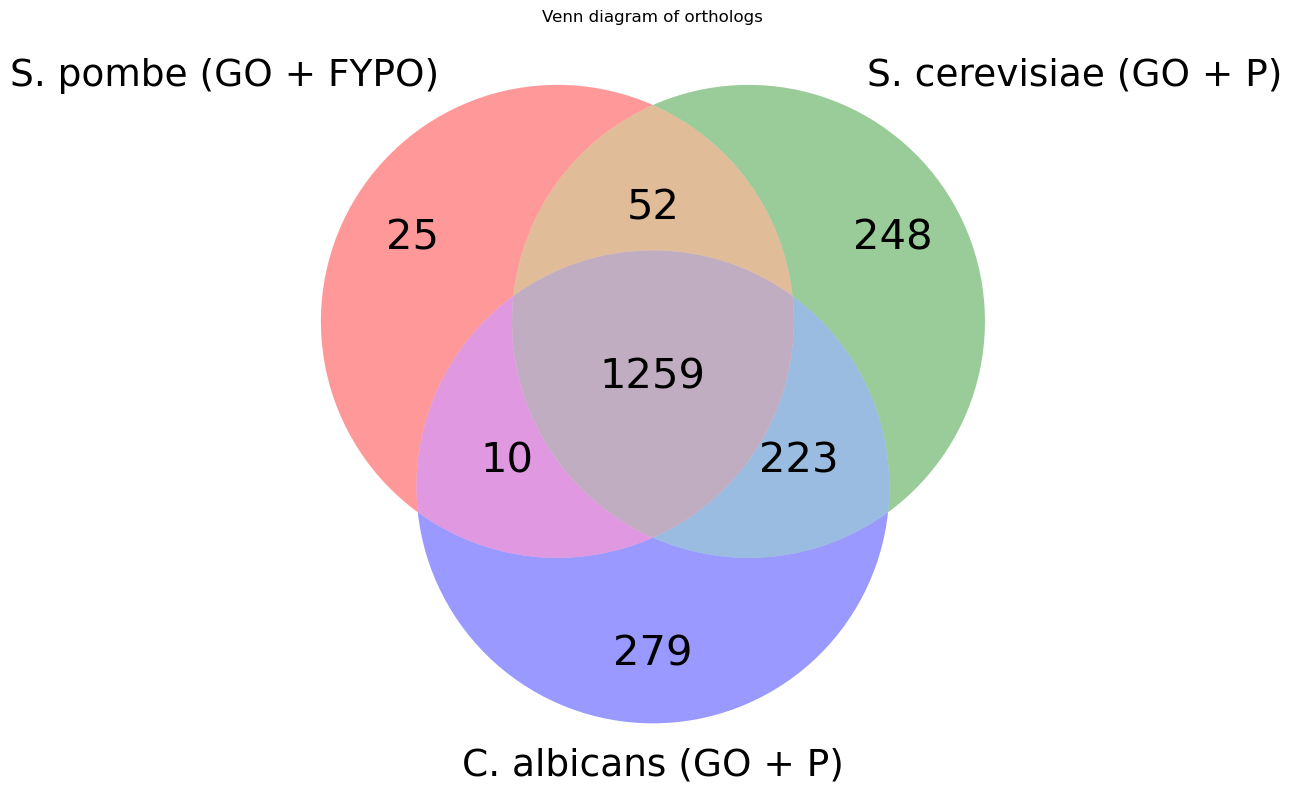

albicans_name(s)      [C3_04290C_A]
cerevisiae_name(s)        [YBR289W]
pombe_name(s)         [SPAC2F7.08c]
albicans                        1.0
cerevisiae                      1.0
pombe                           1.0
orthopattern                      7
Name: 70, dtype: object
albicans_name(s)                    [C1_00060W_A]
cerevisiae_name(s)                      [YCR084C]
pombe_name(s)         [SPAC18B11.10, SPAC630.14c]
albicans                                      1.0
cerevisiae                                    1.0
pombe                                         1.0
orthopattern                                    7
Name: 90, dtype: object
albicans_name(s)       [C5_01250W_A]
cerevisiae_name(s)         [YDL035C]
pombe_name(s)         [SPCC1753.02c]
albicans                         1.0
cerevisiae                       1.0
pombe                            1.0
orthopattern                       7
Name: 95, dtype: object
albicans_name(s)       [C2_08730W_A]
cerevisiae_name(s)         [YD

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,functional_orthopattern orthopattern,orthopattern,gene common name,pombe_function
70,[C3_04290C_A],[YBR289W],[SPAC2F7.08c],1.0,1.0,1.0,7.0,7.0,[snf5],[SWI/SNF complex subunit Snf5]
90,[C1_00060W_A],[YCR084C],"[SPAC18B11.10, SPAC630.14c]",1.0,1.0,1.0,7.0,7.0,[tup12],[transcriptional corepressor Tup12]
95,[C5_01250W_A],[YDL035C],[SPCC1753.02c],1.0,1.0,1.0,7.0,7.0,[git3],[G-protein coupled receptor Git3]
122,[C2_08730W_A],[YDL233W],[SPBC30B4.03c],1.0,1.0,1.0,7.0,7.0,[ldb1],"[LIM domain binding protein, transcription cor..."
152,"[C1_13880C_A, C4_02500C_A]","[YDR216W, YML081W]",[SPAC6F12.02],1.0,1.0,1.0,7.0,7.0,[rst2],[DNA-binding transcription factor Rst2]
189,[C2_01470W_A],[YDR443C],[SPAC589.02c],1.0,1.0,1.0,7.0,7.0,[med13],[mediator complex subunit Med13]
222,[C3_02240C_A],[YER020W],[SPAC23H3.13c],1.0,1.0,1.0,7.0,7.0,[gpa2],[heterotrimeric G protein alpha-2 subunit Gpa2]
237,[C6_04350C_A],[YER109C],"[SPBC1289.10c, SPCC1494.10]",1.0,1.0,1.0,7.0,7.0,[adn3],[DNA-binding transcription factor Adn3]
296,[C3_07320W_A],[YGL197W],[SPBC21.05c],1.0,1.0,1.0,7.0,7.0,[ral2],[Ras1-Scd pathway protein Ral2]
336,"[C4_02960W_A, C4_02970C_A]","[YGR184C, YLR024C]","[SPAC15A10.11, SPBC19C7.02]",1.0,1.0,1.0,7.0,7.0,[ubr1],"[N-end-recognizing protein, UBR ubiquitin-prot..."


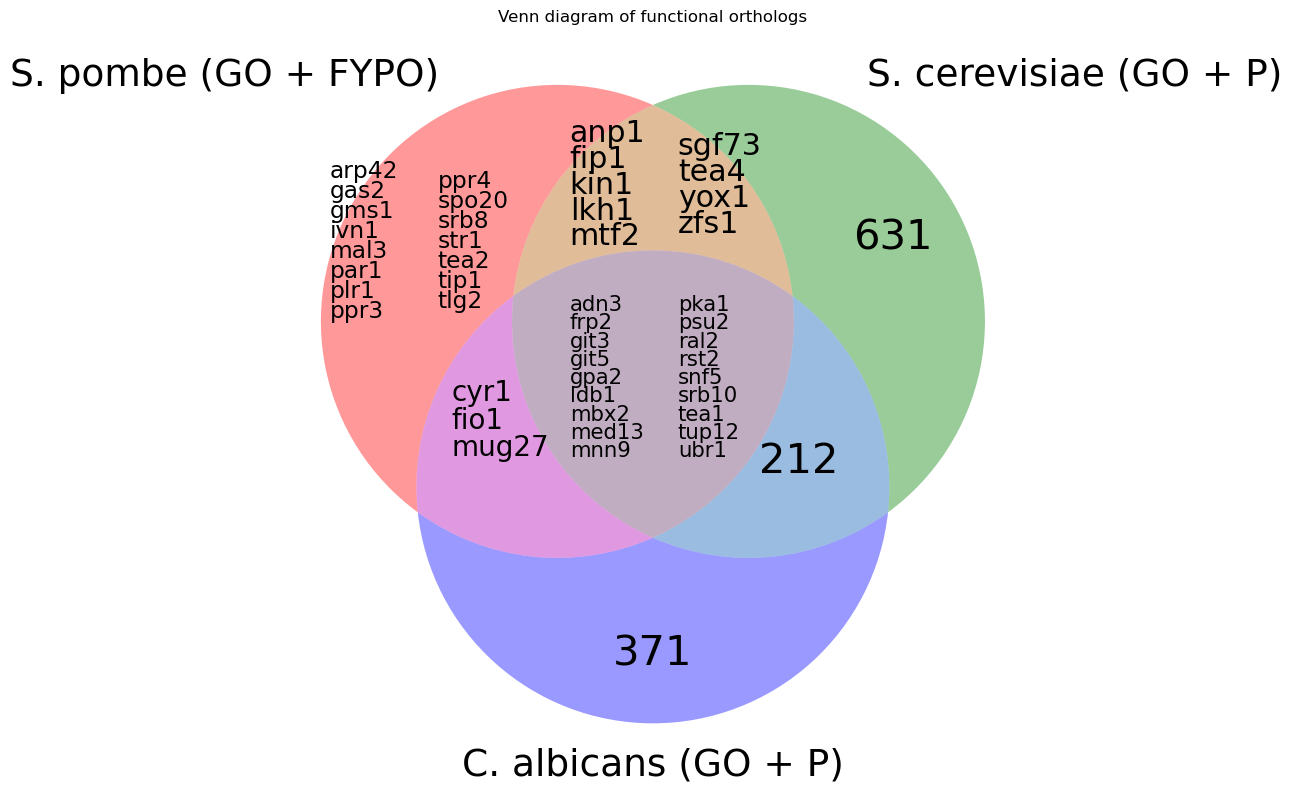

In [211]:
#final ortho
database = make_dbase(albicans_genes_go_po, cerevisiae_genes_go_po, pombe_genes_go_po)
sedb = single_entry_dbase(database)
ortho = add_ortholog_grps(sedb)
print("done")
final_ortho = ortho_to_venn(ortho, labels=['S. pombe (GO + FYPO)', 'S. cerevisiae (GO + P)', 'C. albicans (GO + P)'])


final_ortho.to_csv("final_orthology_database.csv")

#remove duplicate gene common name
final_func_ortho_,venn_dic = functional_ortho(final_ortho,albicans_genes_go_po, cerevisiae_genes_go_po, pombe_genes_go_po)


overlap = show_overlap(final_func_ortho_, venn_dic, cats=[7,6,5,4,3,2,1],labels=['S. pombe (GO + FYPO)', 'S. cerevisiae (GO + P)', 'C. albicans (GO + P)'])
                       #export overlap where functional orthopattern is 7
overlap_=overlap[overlap["functional_orthopattern orthopattern"] == 7]
overlap_.to_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Orthologs/overlap_po_go.csv")
#annotated overlap
overlap_

albicans_name(s)      [C3_04290C_A]
cerevisiae_name(s)        [YBR289W]
pombe_name(s)         [SPAC2F7.08c]
albicans                        1.0
cerevisiae                      1.0
pombe                           1.0
orthopattern                      7
Name: 70, dtype: object
albicans_name(s)                    [C1_00060W_A]
cerevisiae_name(s)                      [YCR084C]
pombe_name(s)         [SPAC18B11.10, SPAC630.14c]
albicans                                      1.0
cerevisiae                                    1.0
pombe                                         1.0
orthopattern                                    7
Name: 90, dtype: object
albicans_name(s)       [C5_01250W_A]
cerevisiae_name(s)         [YDL035C]
pombe_name(s)         [SPCC1753.02c]
albicans                         1.0
cerevisiae                       1.0
pombe                            1.0
orthopattern                       7
Name: 95, dtype: object
albicans_name(s)       [C2_08730W_A]
cerevisiae_name(s)         [YD

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,functional_orthopattern orthopattern,orthopattern,gene common name,pombe_function
70,[C3_04290C_A],[YBR289W],[SPAC2F7.08c],1.0,1.0,1.0,7.0,7.0,[snf5],[SWI/SNF complex subunit Snf5]
90,[C1_00060W_A],[YCR084C],"[SPAC18B11.10, SPAC630.14c]",1.0,1.0,1.0,7.0,7.0,[tup12],[transcriptional corepressor Tup12]
95,[C5_01250W_A],[YDL035C],[SPCC1753.02c],1.0,1.0,1.0,7.0,7.0,[git3],[G-protein coupled receptor Git3]
122,[C2_08730W_A],[YDL233W],[SPBC30B4.03c],1.0,1.0,1.0,7.0,7.0,[ldb1],"[LIM domain binding protein, transcription cor..."
152,"[C1_13880C_A, C4_02500C_A]","[YDR216W, YML081W]",[SPAC6F12.02],1.0,1.0,1.0,7.0,7.0,[rst2],[DNA-binding transcription factor Rst2]
189,[C2_01470W_A],[YDR443C],[SPAC589.02c],1.0,1.0,1.0,7.0,7.0,[med13],[mediator complex subunit Med13]
222,[C3_02240C_A],[YER020W],[SPAC23H3.13c],1.0,1.0,1.0,7.0,7.0,[gpa2],[heterotrimeric G protein alpha-2 subunit Gpa2]
237,[C6_04350C_A],[YER109C],"[SPBC1289.10c, SPCC1494.10]",1.0,1.0,1.0,7.0,7.0,[adn3],[DNA-binding transcription factor Adn3]
296,[C3_07320W_A],[YGL197W],[SPBC21.05c],1.0,1.0,1.0,7.0,7.0,[ral2],[Ras1-Scd pathway protein Ral2]
336,"[C4_02960W_A, C4_02970C_A]","[YGR184C, YLR024C]","[SPAC15A10.11, SPBC19C7.02]",1.0,1.0,1.0,7.0,7.0,[ubr1],"[N-end-recognizing protein, UBR ubiquitin-prot..."


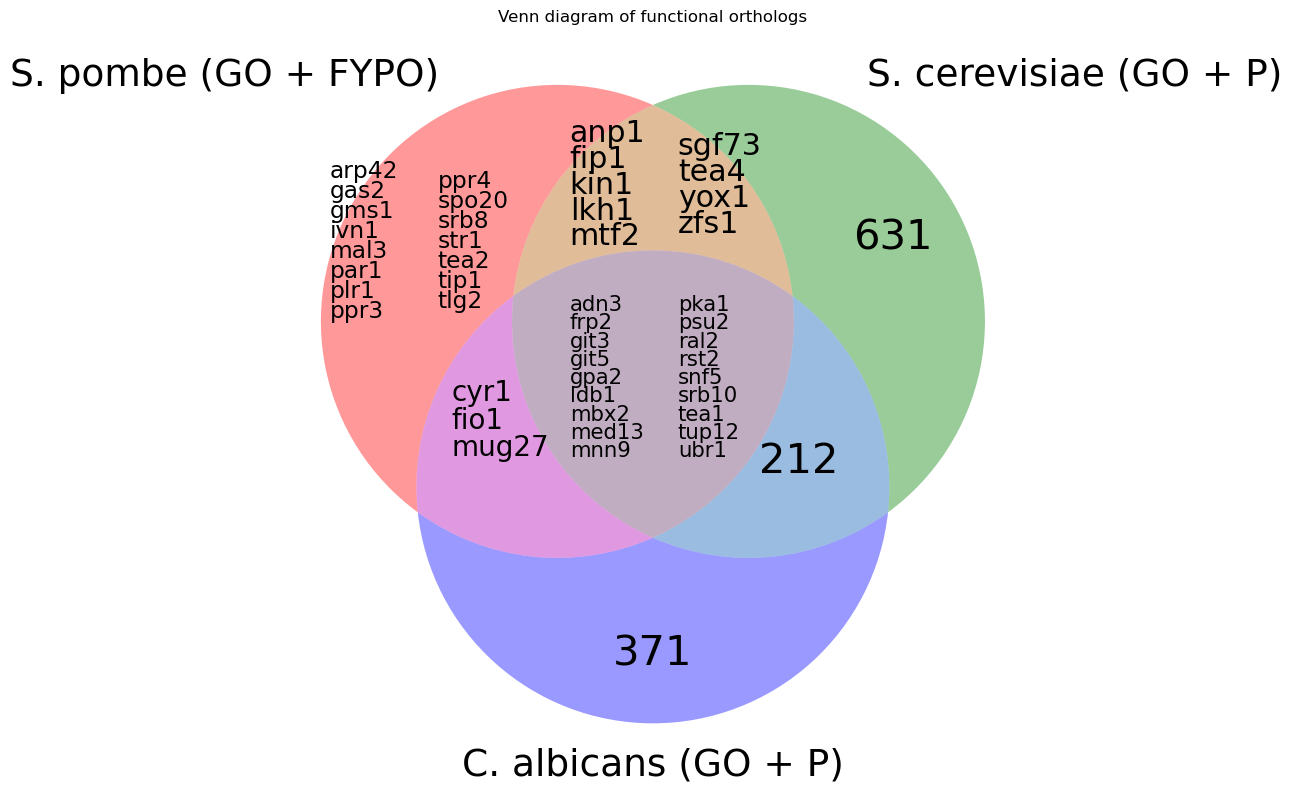

In [212]:
#remove duplicate gene common name
final_func_ortho_,venn_dic = functional_ortho(final_ortho,albicans_genes_go_po, cerevisiae_genes_go_po, pombe_genes_go_po)


overlap = show_overlap(final_func_ortho_, venn_dic, cats=[7,6,5,4,3,2,1],labels=['S. pombe (GO + FYPO)', 'S. cerevisiae (GO + P)', 'C. albicans (GO + P)'])
                       #export overlap where functional orthopattern is 7
overlap_=overlap[overlap["functional_orthopattern orthopattern"] == 7]
overlap_.to_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Orthologs/overlap_po_go.csv")
#annotated overlap
overlap_

In [213]:
#show how many times vlues occur in gene common name in overlap, how many are 2

#show which gene common name occurs 2
overlap[overlap["gene common name"].isin(overlap["gene common name"].value_counts()[overlap["gene common name"].value_counts() == 2].index)]

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,functional_orthopattern orthopattern,orthopattern,gene common name,pombe_function


Checking for orthologs in the deletion library hits

In [214]:
#load in deletion hits
screen = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Bioneer screen/adhesion_ratio.csv', sep=',')
deletion_hits = screen["systematic_name"].values

done
7    1256
3     279
2     248
6     223
4      50
5      10
1       6
Name: orthopattern, dtype: int64


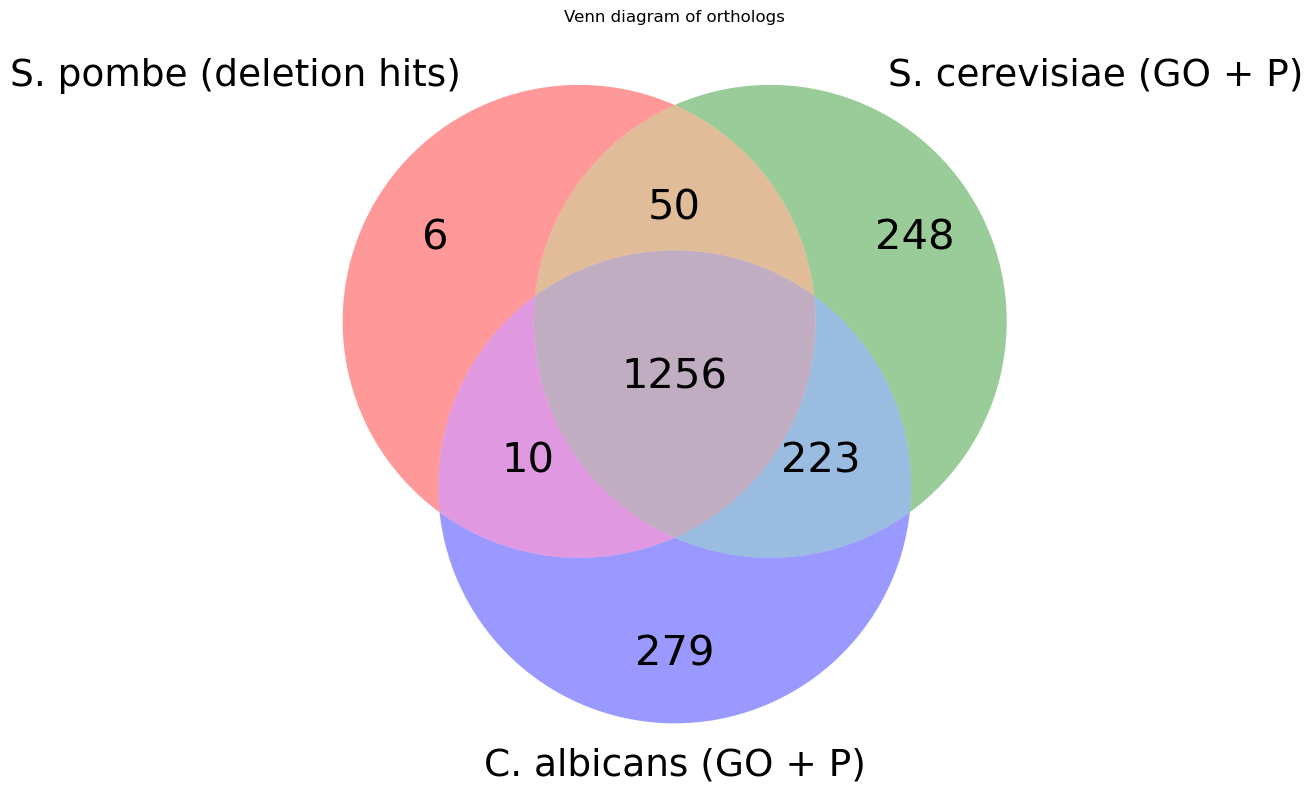

albicans_name(s)      [C3_00670C_A, nan]
cerevisiae_name(s)    [YIL131C, YNL068C]
pombe_name(s)             [SPBC16G5.15c]
albicans                             1.0
cerevisiae                           1.0
pombe                                1.0
orthopattern                           7
Name: 660, dtype: object
0       2
1       2
2       2
3       2
4       2
       ..
1251    1
1252    1
1253    1
1254    1
1255    1
Name: functional_orthopattern orthopattern, Length: 1256, dtype: int64


,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,functional_orthopattern orthopattern,orthopattern,gene common name,pombe_function
660,"[C3_00670C_A, nan]","[YIL131C, YNL068C]",[SPBC16G5.15c],1.0,1.0,1.0,7.0,7.0,[fkh2],[DNA-binding forkhead transcription factor Fkh2]


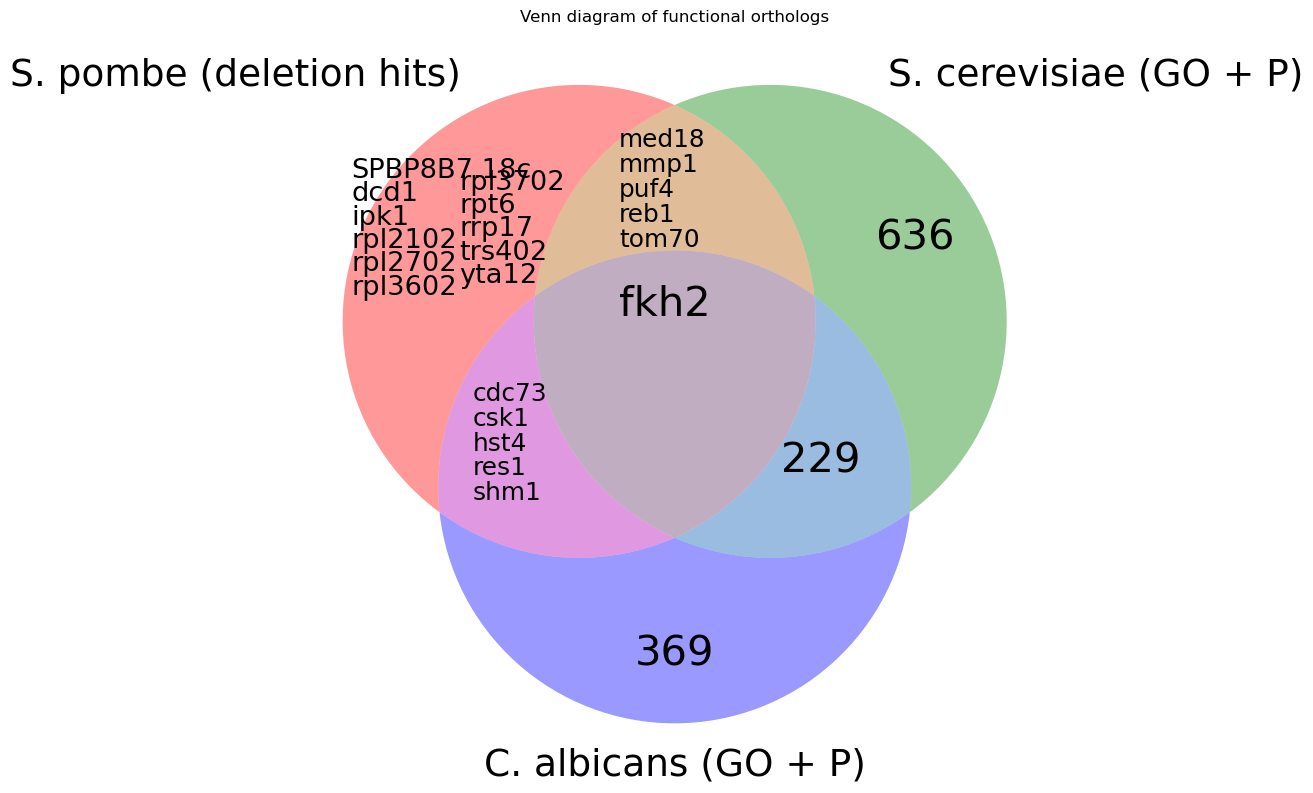

In [215]:
database = make_dbase(albicans_genes_go_po, cerevisiae_genes_go_po, deletion_hits)
sedb = single_entry_dbase(database)
ortho = add_ortholog_grps(sedb)
print("done")
final_ortho = ortho_to_venn(ortho, labels=['S. pombe (deletion hits)', 'S. cerevisiae (GO + P)', 'C. albicans (GO + P)'])


final_ortho.to_csv("final_orthology_database.csv")

#remove duplicate gene common name
final_func_ortho_,venn_dic = functional_ortho(final_ortho,albicans_genes_go_po, cerevisiae_genes_go_po, deletion_hits)


overlap = show_overlap(final_func_ortho_, venn_dic, cats=[7,6,5,4,3,2,1],labels=['S. pombe (deletion hits)', 'S. cerevisiae (GO + P)', 'C. albicans (GO + P)'])
                       #export overlap where functional orthopattern is 7
overlap_=overlap[overlap["functional_orthopattern orthopattern"] == 7]
overlap_.to_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Orthologs/overlap_po_go.csv")
#annotated overlap
overlap_

albicans_name(s)      [C3_00670C_A, nan]
cerevisiae_name(s)    [YIL131C, YNL068C]
pombe_name(s)             [SPBC16G5.15c]
albicans                             1.0
cerevisiae                           1.0
pombe                                1.0
orthopattern                           7
Name: 660, dtype: object
0       2
1       2
2       2
3       2
4       2
       ..
1251    1
1252    1
1253    1
1254    1
1255    1
Name: functional_orthopattern orthopattern, Length: 1256, dtype: int64


,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,functional_orthopattern orthopattern,orthopattern,gene common name,pombe_function
660,"[C3_00670C_A, nan]","[YIL131C, YNL068C]",[SPBC16G5.15c],1.0,1.0,1.0,7.0,7.0,[fkh2],[DNA-binding forkhead transcription factor Fkh2]


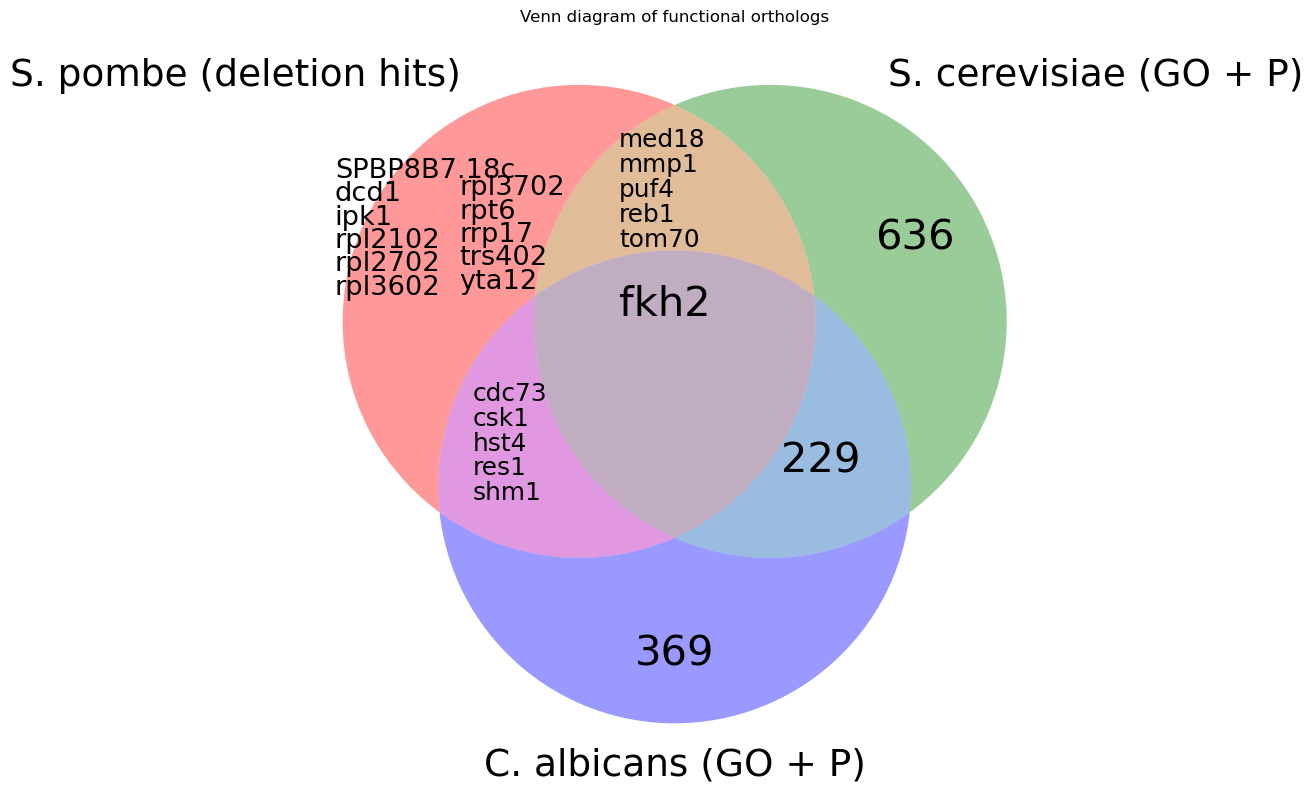

In [219]:
#remove duplicate gene common name
final_func_ortho_,venn_dic = functional_ortho(final_ortho,albicans_genes_go_po, cerevisiae_genes_go_po, deletion_hits)


overlap = show_overlap(final_func_ortho_, venn_dic, cats=[7,6,5,4,3,2,1],labels=['S. pombe (deletion hits)', 'S. cerevisiae (GO + P)', 'C. albicans (GO + P)'])
                       #export overlap where functional orthopattern is 7
overlap_=overlap[overlap["functional_orthopattern orthopattern"] == 7]
overlap_.to_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Orthologs/overlap_po_go.csv")
#annotated overlap
overlap_

In [217]:
#functional ortho 1.0	
overlap[overlap["functional_orthopattern orthopattern"] == 1]

,albicans_name(s),cerevisiae_name(s),pombe_name(s),albicans,cerevisiae,pombe,functional_orthopattern orthopattern,orthopattern,gene common name,pombe_function
1245,[C1_14310W_A],[YHR144C],[SPBC2G2.13c],0.0,0.0,1.0,1.0,7.0,[dcd1],[deoxycytidylate deaminase]
1246,[C2_03960W_A],"[YMR194W, YPL249C-A]",[SPBC405.07],0.0,0.0,1.0,1.0,7.0,[rpl3602],[60S ribosomal protein L36]
1247,[C2_03810C_A],"[YBR191W, YPL079W]",[SPAC959.08],0.0,0.0,1.0,1.0,7.0,[rpl2102],[60S ribosomal protein L21]
1248,[C2_03370W_A],"[YOL055C, YPL258C, YPR121W]",[SPBP8B7.18c],0.0,0.0,1.0,1.0,7.0,[SPBP8B7.18c],[phosphomethylpyrimidine kinase]
1249,[C1_07950C_A],[YDR412W],[SPAC29A4.09],0.0,0.0,1.0,1.0,7.0,[rrp17],[rRNA exonuclease Rrp17]
1250,[C1_12390C_A],"[YDR471W, YHR010W]",[SPCC74.05],0.0,0.0,1.0,1.0,7.0,[rpl2702],[60S ribosomal protein L27]
1251,"[C2_00700W_A, C3_01760W_A]","[YER017C, YMR089C]",[SPBC543.09],0.0,0.0,1.0,1.0,7.0,[yta12],[mitochondrial m-AAA protease Yta12]
1252,[C7_02930C_A],[YOL022C],[SPAC13G6.09],0.0,0.0,1.0,1.0,7.0,[trs402],[SSU-rRNA maturation protein Tsr4 homolog 2 Ts...
1253,[C1_11360W_A],"[YDR500C, YLR185W]",[SPCC1223.05c],0.0,0.0,1.0,1.0,7.0,[rpl3702],[60S ribosomal protein L37]
1254,[C2_08780W_A],[YGL048C],[SPBC23G7.12c],0.0,0.0,1.0,1.0,7.0,[rpt6],[19S proteasome base subcomplex ATPase subunit...
